GitHub Link:https://github.com/SaiCharan99/GL-Capstone-NLP2/tree/main

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU,SimpleRNN
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
#from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

In [2]:
pwd

'/content'

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [5]:
import pandas as pd
df=pd.read_csv("Data Set - industrial_safety_and_health_database_with_accidents_description.csv")

In [6]:
df.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [7]:
df.isnull().sum()
#no null values

Unnamed: 0                  0
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [8]:
df.duplicated().sum()
#no duplicates

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


In [10]:
x=df.copy()

In [11]:
# extracting year,moth and date from timestamp column
year=[]
month=[]
date=[]
for x in range(df.shape[0]):
  h=df['Data'][x].split()
  k=h[0].split('-')
  year.append(int(k[0]))
  month.append(int(k[1]))
  date.append(int(k[2]))

In [12]:
dates=list(zip(year,month,date))
df_date=pd.DataFrame(dates,columns=['Year','Month','Date'])
df_date.head()

,Year,Month,Date
0,2016,1,1
1,2016,1,2
2,2016,1,6
3,2016,1,8
4,2016,1,10


In [13]:
df_new=pd.concat([df,df_date],axis=1)

In [14]:
col=df_new.columns.to_list()
col

['Unnamed: 0',
 'Data',
 'Countries',
 'Local',
 'Industry Sector',
 'Accident Level',
 'Potential Accident Level',
 'Genre',
 'Employee or Third Party',
 'Critical Risk',
 'Description',
 'Year',
 'Month',
 'Date']

In [15]:
#concatenating the columns in one dataframe
col1 =col[:2]+col[-3:]+col[2:-3]
col1

['Unnamed: 0',
 'Data',
 'Year',
 'Month',
 'Date',
 'Countries',
 'Local',
 'Industry Sector',
 'Accident Level',
 'Potential Accident Level',
 'Genre',
 'Employee or Third Party',
 'Critical Risk',
 'Description']

In [16]:
df_latest = df_new[col1]

In [17]:
# Make a copy of the dataframe
df_latest_copy = df_latest.copy()

In [18]:
df_latest.drop(['Unnamed: 0','Data'], axis=1,inplace = True)
df_latest.head(3)

,Year,Month,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016,1,1,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016,1,2,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016,1,6,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...


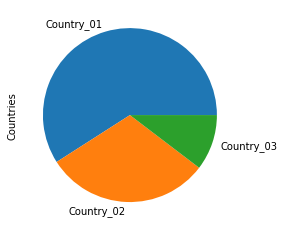

In [19]:
#calculate the percentage of each Country category.
df_latest.Countries.value_counts(normalize=True)

#plot the pie chart of Country categories
df_latest.Countries.value_counts(normalize=True).plot.pie()
plt.show()

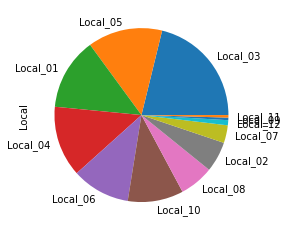

In [20]:
#calculate the percentage of each Local category.
df_latest.Local.value_counts(normalize=True)

#plot the pie chart of Local categories
df_latest.Local.value_counts(normalize=True).plot.pie()
plt.show()

In [21]:
df_latest['Accident Level'].value_counts()

I      316
II      40
III     31
IV      30
V        8
Name: Accident Level, dtype: int64

In [22]:
df_latest['Potential Accident Level'].value_counts()

IV     143
III    106
II      95
I       49
V       31
VI       1
Name: Potential Accident Level, dtype: int64

In [23]:
Potential_Accident_Level = {
    'I'   :   1,
    'II'  :   2,
    'III' :   3,
    'IV'  :   4,
    'V'   :   5,
    'VI'   :   6
}

In [24]:
df_latest['Potential_Accident_Level'] = df_latest['Potential Accident Level'].map(Potential_Accident_Level)

In [25]:
df_latest['Potential_Accident_Level'].value_counts()


4    143
3    106
2     95
1     49
5     31
6      1
Name: Potential_Accident_Level, dtype: int64

In [26]:
Accident_Level = {
    'I'   :   1,
    'II'  :   2,
    'III' :   3,
    'IV'  :   4,
    'V'   :   5
}

In [27]:
df_latest['Accident_Level'] = df_latest['Accident Level'].map(Accident_Level)

In [28]:
df_latest['Accident_Level'].value_counts()

1    316
2     40
3     31
4     30
5      8
Name: Accident_Level, dtype: int64

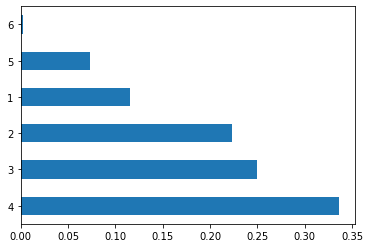

In [29]:
# Let's calculate the percentage of each Accident level category.
df_latest.Potential_Accident_Level.value_counts(normalize=True)

#plot the bar graph of percentage job categories
df_latest.Potential_Accident_Level.value_counts(normalize=True).plot.barh()
plt.show()

In [30]:
df_latest = pd.get_dummies(df_latest, columns=['Date','Year','Countries','Critical Risk','Local','Industry Sector','Genre','Employee or Third Party'],prefix='Dummy',drop_first=True)

In [31]:
df_latest = pd.get_dummies(df_latest, columns=['Month'],prefix='Month',drop_first=True)

In [32]:
df_latest.drop(['Accident Level','Potential Accident Level'],axis=1,inplace=True)

In [33]:
df_latest.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 95 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Description                                      425 non-null    object
 1   Potential_Accident_Level                         425 non-null    int64 
 2   Accident_Level                                   425 non-null    int64 
 3   Dummy_2                                          425 non-null    uint8 
 4   Dummy_3                                          425 non-null    uint8 
 5   Dummy_4                                          425 non-null    uint8 
 6   Dummy_5                                          425 non-null    uint8 
 7   Dummy_6                                          425 non-null    uint8 
 8   Dummy_7                                          425 non-null    uint8 
 9   Dummy_8                                    

In [34]:
#Cleaning up the data,removing stopwords,remove punctuation, converting them into tokens.

In [35]:
import string
import re
import os
import nltk
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords, twitter_samples 

tweet_tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

stopwords_english = stopwords.words('english')


def clean_text(text):
    
    # remove stock market tickers like $GE
    text = re.sub(r'\$\w*', '', text)
    #remove numbers
    text = re.sub(r'\d+', '', text)
    # remove old style retweet text "RT"
    text = re.sub(r'^RT[\s]+', '', text)
    # remove hyperlinks
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    # remove hashtags
    # only removing the hash # sign from the word
    text = re.sub(r'#', '', text)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    text_tokens = tokenizer.tokenize(text)

    text_clean = []
    for word in text_tokens:
        if (word not in stopwords_english and # remove stopwords
            word not in string.punctuation): # remove punctuation
            #tweets_clean.append(word)
            text_clean.append(word)
    ### END CODE HERE ###
    return text_clean

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [36]:
df_latest['Description'][0]

'While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.'

In [37]:
b = clean_text(df_latest['Description'][0])
b

['removing',
 'drill',
 'rod',
 'jumbo',
 'maintenance',
 'supervisor',
 'proceeds',
 'loosen',
 'support',
 'intermediate',
 'centralizer',
 'facilitate',
 'removal',
 'seeing',
 'mechanic',
 'supports',
 'one',
 'end',
 'drill',
 'equipment',
 'pull',
 'hands',
 'bar',
 'accelerate',
 'removal',
 'moment',
 'bar',
 'slides',
 'point',
 'support',
 'tightens',
 'fingers',
 'mechanic',
 'drilling',
 'bar',
 'beam',
 'jumbo']

In [38]:
all_word = []

for row in df_latest['Description']:
    for word in clean_text(row):
        all_word.append(word)

In [39]:
num_words=len(all_word)
num_words

14120

In [40]:
import os
path = os.getcwd()
path


'/content/drive/MyDrive'

In [41]:
df_latest.head()

,Description,Potential_Accident_Level,Accident_Level,Dummy_2,Dummy_3,Dummy_4,Dummy_5,Dummy_6,Dummy_7,Dummy_8,Dummy_9,Dummy_10,Dummy_11,Dummy_12,Dummy_13,Dummy_14,Dummy_15,Dummy_16,Dummy_17,Dummy_18,Dummy_19,Dummy_20,Dummy_21,Dummy_22,Dummy_23,Dummy_24,Dummy_25,Dummy_26,Dummy_27,Dummy_28,Dummy_29,Dummy_30,Dummy_31,Dummy_2017,Dummy_Country_02,Dummy_Country_03,Dummy_Bees,Dummy_Blocking and isolation of energies,Dummy_Burn,Dummy_Chemical substances,...,Dummy_Pressed,Dummy_Pressurized Systems,Dummy_Pressurized Systems / Chemical Substances,Dummy_Projection,Dummy_Projection of fragments,Dummy_Projection/Burning,Dummy_Projection/Choco,Dummy_Projection/Manual Tools,Dummy_Suspended Loads,Dummy_Traffic,Dummy_Vehicles and Mobile Equipment,Dummy_Venomous Animals,Dummy_remains of choco,Dummy_Local_02,Dummy_Local_03,Dummy_Local_04,Dummy_Local_05,Dummy_Local_06,Dummy_Local_07,Dummy_Local_08,Dummy_Local_09,Dummy_Local_10,Dummy_Local_11,Dummy_Local_12,Dummy_Mining,Dummy_Others,Dummy_Male,Dummy_Third Party,Dummy_Third Party (Remote),Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,While removing the drill rod of the Jumbo 08 f...,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,During the activation of a sodium sulphide pum...,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,In the sub-station MILPO located at level +170...,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Being 9:45 am. approximately in the Nv. 1880 C...,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,Approximately at 11:45 a.m. in circumstances t...,4,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip

In [43]:
#!unzip glove*.zip

In [44]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.6B.300d.txt'
word2vec_output_file = 'word2vec.txt'
# The first step is to convert the GloVe file format to the word2vec file format. 
# The only difference is the addition of a small header line. This can be done by calling the 
# glove2word2vec() function.

glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 300)

In [45]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

In [46]:
#Converting Description into GloVe embeddings
import numpy as np
glove_list = list()
for row in df_latest['Description']:
    sentence = np.zeros(300)
    count = 0
    for word in clean_text(row):
        try:
            sentence += model[word]
            count += 1
        except KeyError:
            continue
    glove_list.append(sentence / count)

In [47]:
y = df_latest['Accident_Level']


In [48]:
y.shape

(425,)

In [49]:
X = np.array(glove_list)

In [50]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(np.array(glove_list), y, test_size=0.20,random_state=42)

In [51]:
acc = []
mod = []
def get_accuracy(y,x):
    global t
    acc.append(x)
    mod.append(y)
    temp=pd.DataFrame(mod,columns=['Model'])
    temp1 = pd.DataFrame(acc,columns=['accuracy'])
    t =temp.join(temp1)
    print(t)

In [52]:
from sklearn.ensemble import  RandomForestClassifier
rf =  RandomForestClassifier()

In [53]:
rf.fit(X_tr,y_tr)

RandomForestClassifier()

In [54]:
print(rf.score(X_tr,y_tr))
print(rf.score(X_te,y_te))

0.9941176470588236
0.8


In [55]:
get_accuracy('RandomForestClassifier',rf.score(X_te,y_te))

                    Model  accuracy
0  RandomForestClassifier       0.8


In [56]:
#taking GloVe embeddings
b = np.array(glove_list)

In [57]:
df = pd.DataFrame(b)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0.031929,0.065908,0.000504,-0.266411,-0.157503,-0.071912,0.102450,-0.030347,0.025684,-0.871705,-0.140715,0.120205,0.196227,-0.071967,-0.048902,0.166913,0.012817,-0.132208,-0.095033,0.012931,0.049327,0.100427,0.071991,0.028853,-0.106861,0.042053,-0.014210,0.040193,-0.045428,0.061043,0.076868,0.113543,0.079108,0.046920,-0.384206,0.281747,0.028889,-0.051389,-0.016994,0.143234,...,0.020711,-0.112482,-0.078719,0.112071,0.087575,0.059772,-0.169112,0.164174,-0.222369,0.019496,-0.014590,0.026808,-0.031191,0.058408,-0.006079,-0.100395,-1.276730,-0.017799,0.093760,0.048450,-0.031952,0.004834,-0.052919,-0.091427,0.114238,-0.020639,0.015775,0.030268,-0.068567,0.070028,-0.043635,-0.106893,-0.112524,-0.026297,-0.001618,0.178445,-0.012231,-0.274742,-0.061944,0.029341
1,-0.076368,0.148687,-0.058655,-0.157428,-0.003549,-0.076084,0.054584,-0.117375,0.074852,-0.928482,-0.047066,0.001696,-0.074007,-0.062746,0.120129,0.168230,-0.289644,-0.031182,-0.011097,-0.121397,-0.135411,-0.191753,-0.017601,0.203478,-0.161718,0.090443,0.028583,0.086308,-0.134160,-0.085224,-0.094764,0.060291,-0.062539,0.042310,-0.042176,0.067881,-0.052165,0.041958,-0.004361,0.167184,...,-0.106220,-0.100515,0.034894,-0.012409,0.026067,-0.067313,0.107850,0.034750,0.174190,-0.012373,0.014055,0.074457,-0.157993,-0.013718,-0.178949,0.143486,-1.046183,0.097376,-0.067548,-0.033097,-0.009753,0.004200,0.048203,-0.009352,0.009960,0.164236,-0.109522,-0.108427,-0.026720,0.119548,-0.400516,-0.105114,0.056700,0.052381,0.106906,-0.183209,0.059519,-0.223341,-0.119994,-0.040991
2,-0.065804,0.188262,-0.208724,-0.161652,0.003845,-0.058900,-0.194206,-0.061087,0.022911,-0.797878,-0.182133,-0.012979,0.091481,0.030917,0.047053,0.047946,-0.167418,0.189820,0.038910,0.053688,-0.027311,0.049619,0.016062,-0.053355,-0.143256,0.036068,-0.057737,-0.123490,0.055174,0.142733,0.094385,0.247464,-0.093732,0.116089,-0.347070,0.009817,-0.011419,-0.021043,0.013172,0.123036,...,-0.013121,-0.043517,0.043174,0.002950,-0.134849,-0.051595,-0.139325,0.011412,-0.084406,-0.024539,-0.075049,-0.113247,-0.010535,-0.000021,-0.092357,-0.070898,-1.068272,0.042078,-0.148169,0.138523,-0.064990,0.014196,-0.007171,0.084843,0.037323,0.148682,0.000040,-0.018863,0.006714,-0.117217,0.010357,-0.101688,-0.013859,0.106046,0.125163,0.168526,0.032519,-0.136656,0.052268,-0.103666
3,-0.034208,0.045705,-0.000197,-0.171430,-0.060930,-0.096957,-0.081918,0.024665,-0.014616,-0.754523,-0.135327,0.012887,0.056321,-0.121038,-0.048627,0.069380,-0.059485,0.033872,-0.052954,0.053419,0.019448,-0.038490,0.101193,-0.098182,0.030148,0.117174,0.002556,0.065339,0.009910,0.086257,0.176449,0.130957,0.036352,0.062016,-0.402928,0.076029,0.004029,0.007263,-0.064948,0.157893,...,-0.006978,-0.109890,0.111770,0.107805,0.007336,-0.071402,-0.077680,0.020023,-0.130708,0.098009,-0.019248,-0.062478,0.003291,0.144110,-0.037476,-0.021478,-0.805731,0.012863,0.059976,0.138287,-0.000703,0.000254,0.022524,0.020862,0.044863,-0.034708,0.002827,0.036302,-0.020067,-0.118084,-0.032944,-0.082572,0.061540,-0.028701,-0.019749,0.240793,-0.096363,-0.122852,-0.041779,-0.049481
4,-0.107266,0.097823,-0.100959,-0.044240,-0.094922,-0.049319,0.104563,0.048929,0.025315,-0.883560,-0.003587,-0.023322,-0.037468,-0.048457,0.086830,0.083023,-0.203557,0.030975,-0.057466,-0.054935,-0.002285,-0.022761,0.039996,0.090564,-0.094157,0.058614,0.016360,0.000003,-0.031906,0.113934,0.016454,0.305550,-0.000093,-0.004877,-0.356293,0.044580,0.020696,0.019690,-0.039296,0.233968,...,0.003145,-0.128399,0.011546,0.006410,-0.132167,0.060463,-0.027370,0.121332,-0.003878,-0.055843,-0.133860,-0.035754,-0.043740,0.021324,-0.114019,0.021098,-0.922580,-0.153251,-0.054065,0.111974,-0.007964,-0.065087,0.060382,0.040139,-0.064603,0.219110,-0.073252,0.009338

In [58]:
new_df = pd.concat([df_latest,df],axis=1)

In [59]:
new_df.drop(['Description'],axis=1,inplace=True)

In [60]:
new_df.shape

(425, 394)

In [61]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Columns: 394 entries, Potential_Accident_Level to 299
dtypes: float64(300), int64(2), uint8(92)
memory usage: 1.0 MB


In [62]:
df_final = new_df.copy()

In [63]:
X = df_final.copy()

In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Columns: 394 entries, Potential_Accident_Level to 299
dtypes: float64(300), int64(2), uint8(92)
memory usage: 1.0 MB


In [65]:
y.value_counts()

1    316
2     40
3     31
4     30
5      8
Name: Accident_Level, dtype: int64

In [66]:
X.head(5)

,Potential_Accident_Level,Accident_Level,Dummy_2,Dummy_3,Dummy_4,Dummy_5,Dummy_6,Dummy_7,Dummy_8,Dummy_9,Dummy_10,Dummy_11,Dummy_12,Dummy_13,Dummy_14,Dummy_15,Dummy_16,Dummy_17,Dummy_18,Dummy_19,Dummy_20,Dummy_21,Dummy_22,Dummy_23,Dummy_24,Dummy_25,Dummy_26,Dummy_27,Dummy_28,Dummy_29,Dummy_30,Dummy_31,Dummy_2017,Dummy_Country_02,Dummy_Country_03,Dummy_Bees,Dummy_Blocking and isolation of energies,Dummy_Burn,Dummy_Chemical substances,Dummy_Confined space,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.020711,-0.112482,-0.078719,0.112071,0.087575,0.059772,-0.169112,0.164174,-0.222369,0.019496,-0.014590,0.026808,-0.031191,0.058408,-0.006079,-0.100395,-1.276730,-0.017799,0.093760,0.048450,-0.031952,0.004834,-0.052919,-0.091427,0.114238,-0.020639,0.015775,0.030268,-0.068567,0.070028,-0.043635,-0.106893,-0.112524,-0.026297,-0.001618,0.178445,-0.012231,-0.274742,-0.061944,0.029341
1,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,-0.106220,-0.100515,0.034894,-0.012409,0.026067,-0.067313,0.107850,0.034750,0.174190,-0.012373,0.014055,0.074457,-0.157993,-0.013718,-0.178949,0.143486,-1.046183,0.097376,-0.067548,-0.033097,-0.009753,0.004200,0.048203,-0.009352,0.009960,0.164236,-0.109522,-0.108427,-0.026720,0.119548,-0.400516,-0.105114,0.056700,0.052381,0.106906,-0.183209,0.059519,-0.223341,-0.119994,-0.040991
2,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-0.013121,-0.043517,0.043174,0.002950,-0.134849,-0.051595,-0.139325,0.011412,-0.084406,-0.024539,-0.075049,-0.113247,-0.010535,-0.000021,-0.092357,-0.070898,-1.068272,0.042078,-0.148169,0.138523,-0.064990,0.014196,-0.007171,0.084843,0.037323,0.148682,0.000040,-0.018863,0.006714,-0.117217,0.010357,-0.101688,-0.013859,0.106046,0.125163,0.168526,0.032519,-0.136656,0.052268,-0.103666
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-0.006978,-0.109890,0.111770,0.107805,0.007336,-0.071402,-0.077680,0.020023,-0.130708,0.098009,-0.019248,-0.062478,0.003291,0.144110,-0.037476,-0.021478,-0.805731,0.012863,0.059976,0.138287,-0.000703,0.000254,0.022524,0.020862,0.044863,-0.034708,0.002827,0.036302,-0.020067,-0.118084,-0.032944,-0.082572,0.061540,-0.028701,-0.019749,0.240793,-0.096363,-0.122852,-0.041779,-0.049481
4,4,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.003145,-0.128399,0.011546,0.006410,-0.132167,0.060463,-0.027370,0.121332,-0.003878,-0.055843,-0.133860,-0.035754,-0.043740,0.021324,-0.114019,0.021098,-0.922580,-0.153251,-0.054065,0.111974,-0.007964,-0.065087,0.060382,0.040139,-0.064603,0.219110,-0.073252,0.009338,-0.008619,0.059100,0.101922,-0.070292,0.009434,-0.084649,0.128774,0.291641,-0.016530,-0.101362,-0.066211,-0.088439


In [67]:
X.drop('Accident_Level',axis=1,inplace=True)

In [68]:
Y=list(y)
len(Y)

425

In [69]:
y =np.array(Y)

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.20, random_state = 55)

In [71]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train,y_train = oversample.fit_resample(X_train.values, Y_train.ravel())

In [72]:
rf2 =  RandomForestClassifier()
rf2.fit(x_train,y_train)
rf2.score(X_test,Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.7529411764705882

In [73]:
get_accuracy('RandomForestClassifier SMOTE',rf2.score(X_test,Y_test))

                          Model  accuracy
0        RandomForestClassifier  0.800000
1  RandomForestClassifier SMOTE  0.752941


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [74]:
rf2.score(x_train,y_train)

0.9992063492063492

In [75]:
rf2.score(X_test,Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.7529411764705882

In [76]:
X_test

,Potential_Accident_Level,Dummy_2,Dummy_3,Dummy_4,Dummy_5,Dummy_6,Dummy_7,Dummy_8,Dummy_9,Dummy_10,Dummy_11,Dummy_12,Dummy_13,Dummy_14,Dummy_15,Dummy_16,Dummy_17,Dummy_18,Dummy_19,Dummy_20,Dummy_21,Dummy_22,Dummy_23,Dummy_24,Dummy_25,Dummy_26,Dummy_27,Dummy_28,Dummy_29,Dummy_30,Dummy_31,Dummy_2017,Dummy_Country_02,Dummy_Country_03,Dummy_Bees,Dummy_Blocking and isolation of energies,Dummy_Burn,Dummy_Chemical substances,Dummy_Confined space,Dummy_Cut,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
104,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0.139336,-0.152317,0.056557,0.104570,-0.012129,0.023264,-0.127611,0.015688,-0.055121,-0.058663,0.110477,0.007764,-0.110247,0.107657,-0.220788,-0.010200,-1.143331,0.071060,-0.092050,0.105148,0.001241,-0.057313,-0.015071,0.144619,0.018381,0.091666,0.037062,0.106940,-0.065238,-0.015347,0.117806,-0.161575,0.043150,0.087090,0.088445,0.007339,-0.047126,-0.127526,0.041759,-0.063060
232,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,-0.116189,0.002624,-0.023053,0.006335,0.012368,0.004821,-0.091220,-0.015869,-0.149037,-0.040116,-0.070721,-0.071022,0.091451,0.045757,0.001742,-0.008043,-1.152550,-0.034236,0.097176,0.036488,-0.103139,0.088966,-0.094913,-0.107305,-0.044592,0.097011,-0.089901,0.058073,0.059114,-0.006050,-0.002674,-0.028443,-0.029926,0.028214,0.086015,0.282243,-0.043298,-0.187984,-0.098386,-0.043269
378,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,...,-0.048240,-0.068933,-0.022531,0.112946,-0.120677,0.111992,-0.124814,0.018148,-0.131301,-0.048181,-0.059797,-0.102651,0.062783,0.021872,0.045106,0.045196,-1.289252,0.069674,0.172450,0.201466,-0.110485,0.143604,0.143470,0.235580,0.014595,0.074844,-0.041795,0.013764,0.032360,-0.140198,-0.031919,-0.121631,-0.048266,0.059955,0.007812,0.041995,0.008840,-0.057527,-0.018348,-0.193679
30,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.076790,-0.059784,-0.059185,0.091651,-0.099580,0.003459,0.008436,0.058405,-0.084418,-0.043178,-0.064895,-0.078495,-0.087413,-0.064348,-0.164127,-0.128625,-1.102335,-0.093866,-0.076538,0.132154,-0.151983,-0.018200,0.147422,0.030887,0.015511,0.129654,0.023566,-0.116194,0.025938,0.033884,-0.072206,0.119788,-0.030788,0.071760,0.103821,0.221972,0.023627,-0.234525,0.105198,0.001881
168,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.108431,-0.091250,0.003701,0.131460,0.054525,0.084769,0.015757,0.086259,0.096524,0.030084,-0.128179,-0.010060,0.008782,-0.045057,0.021415,-0.066178,-1.030226,-0.156701,-0.000695,0.126347,-0.094861,-0.026457,-0.042842,-0.098571,0.058413,0.107098,0.033796,0.011972,0.071711,0.175753,-0.057059,0.074746,-0.127896,-0.049201,-0.041981,0.168747,-0.000475,-0.265534,-0.058070,0.049311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.076250,-0.095515,-0.009640,0.149942,0.049789,0.048797,-0.037231,0.115161,-0.124199,0.026139,0.053658,-0.061966,-0.003406,0.167309,-0.111764,0.007934,-0.907899,-0.048776,-0.067585,0.038089,-0.151375,-0.041630,0.019547,-0.007488,-0.066928,0.131436,0.003299,-0.034181,-0.054188,-0.003289,0.024040,-0.038465,0.016728,0.061801,0.117664,0.056453,0.070296,-0.072538,0.136980,-0.109295
399,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,...,-0.234981,-0.232919,0.083003,0.080134,0.002877,-0.013851,-0.083873,-0.195838,-0.079583,-0.154905,0.060581,-0.132905,-0.093842,0.003203,-0.119535,0.027238,-1.276

In [77]:
pred = rf2.predict(X_test)
pred = pred.astype(int)
pred

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [78]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           1       0.77      0.98      0.86        64
           2       1.00      0.17      0.29         6
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2

    accuracy                           0.75        85
   macro avg       0.35      0.23      0.23        85
weighted avg       0.65      0.75      0.67        85



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
from sklearn.ensemble import BaggingClassifier
bgcl=BaggingClassifier()

In [80]:
bgcl.fit(x_train,y_train)

BaggingClassifier()

In [81]:
bgcl.score(x_train,y_train)

0.9992063492063492

In [82]:
bgcl.score(X_test,Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.7529411764705882

In [83]:
pred = bgcl.predict(X_test)
pred = pred.astype(int)
pred

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([1, 1, 1, 1, 3, 4, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 5, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 5, 1, 1, 1, 1, 1, 1, 5, 1])

In [84]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           1       0.84      0.92      0.88        64
           2       0.50      0.17      0.25         6
           3       0.14      0.12      0.13         8
           4       0.33      0.20      0.25         5
           5       0.67      1.00      0.80         2

    accuracy                           0.75        85
   macro avg       0.50      0.48      0.46        85
weighted avg       0.72      0.75      0.73        85



In [85]:
if 'run_chatbot' in st.session_state:
                        with col102:
                          description = st.text_area('Please enter the Accident description here', value='default_value',
                                                      height = 200, key= 'description')
                        if description is not 'default_value':
                          with col102:
                            st.write('current description value is: ',description)
                          desc = preprecess_chatbot(st.session_state.description,st.session_state.Vector)
                          probs= st.session_state.final_model.predict(desc.todense())
                          result = [np.argmax(probs)]
                          with col102:
                            st.write('Result probabilities are: ',probs)
                            #st.write('result value is:', result)
                            #try:
                            #  st.write('result probabilities are: ',st.session_state.final_model.predict_prob(desc))
                            #except:
                            #  pass
                            st.write('**Predicted Accident level is: **',st.session_state.lb.inverse_transform(result)[0])


TclError: ignored

In [ ]:
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, SimpleRNN
from keras.initializers import Constant
lstm_model = Sequential()

lstm_model.add(Embedding(input_dim=num_words, output_dim=300, embeddings_initializer=Constant(embedding_matrix), 
                    input_length=max_len, trainable=False))
lstm_model.add(LSTM(64, dropout=0.1))
lstm_model.add(Dense(num_words, activation='softmax'))

lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm_model.summary()

In [ ]:
history = lstm_model.fit(x_train,y_train, epochs=4, batch_size=1024, validation_data=(X_test,Y_test))


In [ ]:
from sklearn.ensemble import BaggingClassifier
bgcl=BaggingClassifier()

In [ ]:
bgcl.fit(X_tr,y_tr)

In [ ]:
bgcl.score(X_tr,y_tr)

In [ ]:
bgcl.score(X_te,y_te)

In [ ]:
get_accuracy('BaggingClassifier',bgcl.score(X_te,y_te))

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
X = df_latest['Description'].values
y = df_latest['Accident_Level'].values
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=20)
Y=list(y)
len(Y)

y =np.array(Y)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 55)	

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train,y_train = oversample.fit_resample(X_train, Y_train.ravel())

max_len = 32
tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=max_len, truncating='post', padding='post')

X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=max_len, truncating='post', padding='post')

word_index = tokenizer.word_index
print("Number of unique words: {}".format(len(word_index)))

embedding = {}
with open("glove.6B.300d.txt", encoding='utf-8') as file:
    for line in file:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:], 'float32')
        embedding[word] = vectors
file.close()

embedding_matrix = np.zeros((num_words, 300))
for i, word in tokenizer.index_word.items():
    if i < (num_words+1):
        vector = embedding.get(word)
        if vector is not None:
            embedding_matrix[i] = vector

embedding_matrix.shape

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [ ]:
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, SimpleRNN
from keras.initializers import Constant
lstm_model = Sequential()

lstm_model.add(Embedding(input_dim=num_words, output_dim=300, embeddings_initializer=Constant(embedding_matrix), 
                    input_length=max_len, trainable=False))
lstm_model.add(LSTM(64, dropout=0.1))
lstm_model.add(Dense(num_words, activation='softmax'))

lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm_model.summary()

In [ ]:
history = lstm_model.fit(X_train, y_train, epochs=4, batch_size=1024, validation_data=(X_test, y_test))


In [ ]:
print(classification_report(y_test, np.argmax(lstm_model.predict(X_test), axis=-1)))


In [ ]:
biLSTM = Sequential()
import tensorflow as tf
biLSTM.add(Embedding(input_dim=num_words, output_dim=300, 
                    embeddings_initializer=Constant(embedding_matrix), 
        input_length=max_len, trainable=False))
biLSTM.add(Bidirectional(LSTM(units=64, recurrent_dropout = 0.3, dropout = 0.3, 
                             return_sequences = True)))
biLSTM.add(Bidirectional(LSTM(units=32, recurrent_dropout = 0.1, dropout = 0.1)))
biLSTM.add(Dense(num_words, activation='softmax'))


In [ ]:
biLSTM.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 0.01), 
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
biLSTM.summary()

In [ ]:
history = biLSTM.fit(X_train, y_train, epochs=4, batch_size=1024, 
                    validation_data=(X_test, y_test))

In [ ]:
print(classification_report(y_test, np.argmax(biLSTM.predict(X_test), axis=-1)))

In [ ]:
%%shell
jupyter nbconvert --to html /content/Cap_proj (1).ipynb